In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# wczytanie danych o populacji zawierającej grupy z powyższonym odsetkiem deaktywowanych kart kredytowych
df_deactivated = pd.read_csv(
    'https://raw.githubusercontent.com/CodersLab/DataLab_intro/main/processed/BankChurner_Deactivated.csv',
    sep=";"
)

# wczytanie danych o populacji zawierającej grupy z 'standardowym' odsetkiem deaktywowanych kart kredytowych
df_active = pd.read_csv(
    'https://raw.githubusercontent.com/CodersLab/DataLab_intro/main/processed/BankChurner_Active.csv',
    sep=";"
)

In [2]:
df_deactivated.head()

,Client_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Is_Active,Years_on_book,Customer_Age_agg,Total_Trans_Amt_agg,Total_Trans_Ct_agg
0,768805383,Existing Customer,45,M,3,3. High School,Married,3. $60K - 80K,1. Blue,39,...,1.335,1144,42,1.625,0.061,1,"(3, 4]","(40, 45]","(1000, 1500]","(40, 50]"
1,818770008,Existing Customer,49,F,5,4. Graduate,Single,1. < $40K,1. Blue,44,...,1.541,1291,33,3.714,0.105,1,"(3, 4]","(45, 50]","(1000, 1500]","(30, 40]"
2,810347208,Existing Customer,51,M,4,7. Unknown,Married,5. 120K+,3. Gold,46,...,1.975,1330,31,0.722,0.066,1,"(3, 4]","(50, 55]","(1000, 1500]","(30, 40]"
3,818906208,Existing Customer,32,M,0,3. High School,Unknown,3. $60K - 80K,2. Silver,27,...,2.204,1538,36,0.714,0.048,1,"(2, 3]","(30, 35]","(1500, 2000]","(30, 40]"
4,719661558,Existing Customer,48,M,2,4. Graduate,Single,4. $80K - 120K,1. Blue,36,...,1.524,1441,32,0.882,0.144,1,"(2, 3]","(45, 50]","(1000, 1500]","(30, 40]"


In [3]:
df_active.head()

,Client_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Is_Active,Years_on_book,Customer_Age_agg,Total_Trans_Amt_agg,Total_Trans_Ct_agg
0,713982108,Existing Customer,51,M,3,4. Graduate,Married,4. $80K - 120K,1. Blue,36,...,2.594,1887,20,2.333,0.000,1,"(2, 3]","(50, 55]","(1500, 2000]","(10, 20]"
1,769911858,Existing Customer,40,F,4,3. High School,Unknown,1. < $40K,1. Blue,34,...,1.405,1171,20,2.333,0.760,1,"(2, 3]","(35, 40]","(1000, 1500]","(10, 20]"
2,709106358,Existing Customer,40,M,3,1. Uneducated,Married,3. $60K - 80K,1. Blue,21,...,2.175,816,28,2.500,0.000,1,"(1, 2]","(35, 40]","(500, 1000]","(20, 30]"
3,713061558,Existing Customer,44,M,2,4. Graduate,Married,2. $40K - 60K,1. Blue,36,...,1.376,1088,24,0.846,0.311,1,"(2, 3]","(40, 45]","(1000, 1500]","(20, 30]"
4,710930508,Existing Customer,37,M,3,1. Uneducated,Single,3. $60K - 80K,1. Blue,36,...,3.355,1350,24,1.182,0.113,1,"(2, 3]","(35, 40]","(1000, 1500]","(20, 30]"


In [4]:
def compare_groups(col_name):
    ct = pd.crosstab(
        index=df[col_name],  # określamy, która kolumna ma być wyświetlona na wierszach
        columns=df["Group_Name"],  # określamy, że na kolumnach będą pojawiać się tylko dwie grupy (karty aktywne/nieaktywne)
        values=df["Client_ID"],  # określamy, która kolumna ma zostać zagregowana
        aggfunc="count",  # określamy funkcję do agregacji, tutaj - zliczanie
        normalize="columns"  # określamy, że chcemy wyznaczyć rozkład procentowy dla kolumn (odpowiednik podsumuje jako % kolumny z Excel)
    )

    # stworzymy sobie dodatkowo kolumnę `Diff`, która będzie mówiła nam
    # o różnicach w poszczególnych grupach
    ct["Diff"] = ct.apply(
        lambda x: x[0] - x[1],  # x[0] oznacza tutaj kolumnę Active, zaś x[1] Deactivated
        axis=1  # określamy, że chcemy przebiegać ramkę powyższą funkcją wiersz po wierszu
    )

    return ct

In [5]:
def visualize_comparison(ct):
    # w pierwszej kolejności usuwamy kolumnę diff, nie chcemy jej wyświetlać na wykresie
    _ct = ct.drop(columns=["Diff"])

    # tworzenie wykresu
    fig = _ct.plot(
        kind="bar",  # określamy typ wykresu
        title="Comparision between groups",
        figsize=(15, 10)
        )

    return fig

In [6]:
df_deactivated["Group_Name"] = "Deactivated"
df_active["Group_Name"] = "Active"

df = pd.concat([df_active, df_deactivated])

In [7]:
gender_ct = compare_groups("Gender")
gender_ct

Group_Name,Active,Deactivated,Diff
Gender,,,
F,0.548175,0.486633,0.061542
M,0.451825,0.513367,-0.061542


<AxesSubplot: title={'center': 'Comparision between groups'}, xlabel='Gender'>

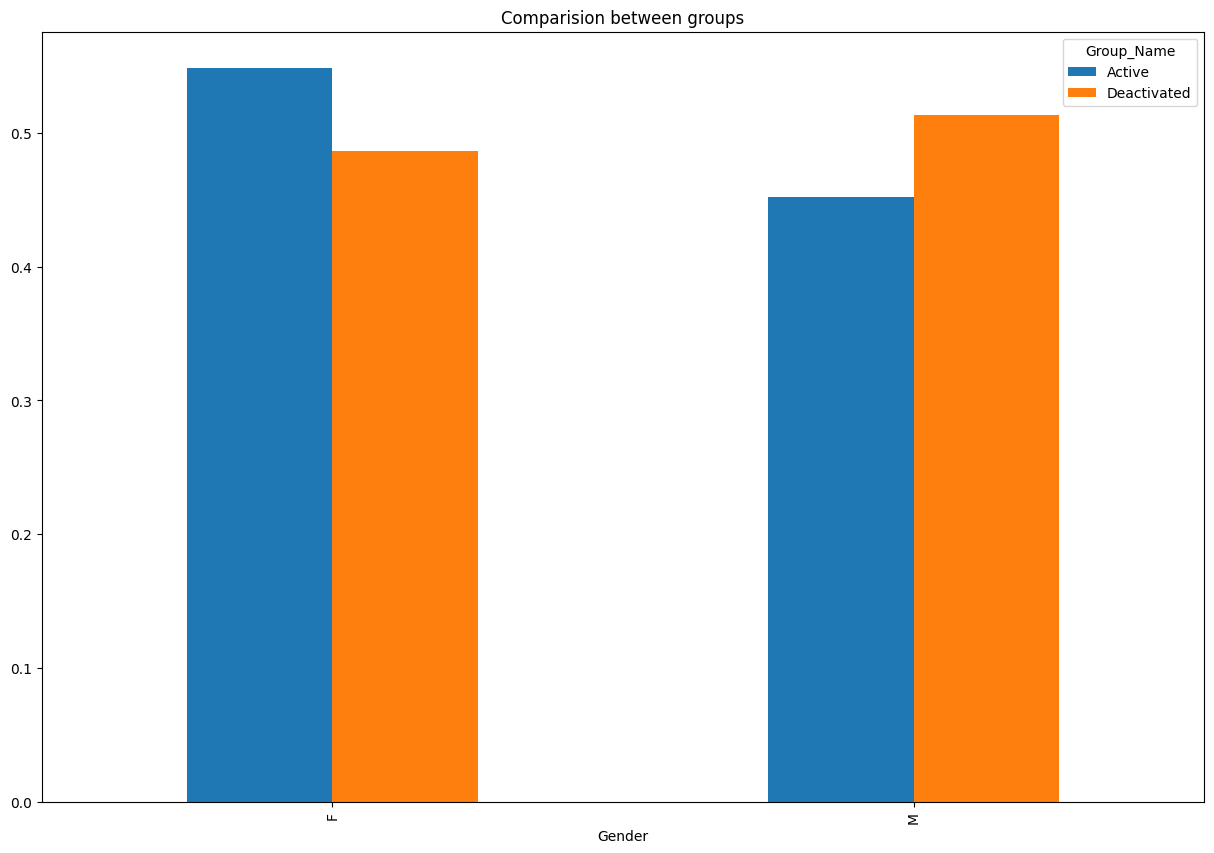

In [8]:
visualize_comparison(gender_ct)

In [9]:
education_level_ct = compare_groups("Education_Level")
education_level_ct

Group_Name,Active,Deactivated,Diff
Education_Level,,,
1. Uneducated,0.148890,0.142266,0.006624
2. College,0.099785,0.100573,-0.000788
3. High School,0.198282,0.199873,-0.001591
4. Graduate,0.309807,0.306811,0.002996
5. Post-Graduate,0.051110,0.050605,0.000505
6. Doctorate,0.042233,0.049650,-0.007417
7. Unknown,0.149893,0.150223,-0.000330


<AxesSubplot: title={'center': 'Comparision between groups'}, xlabel='Education_Level'>

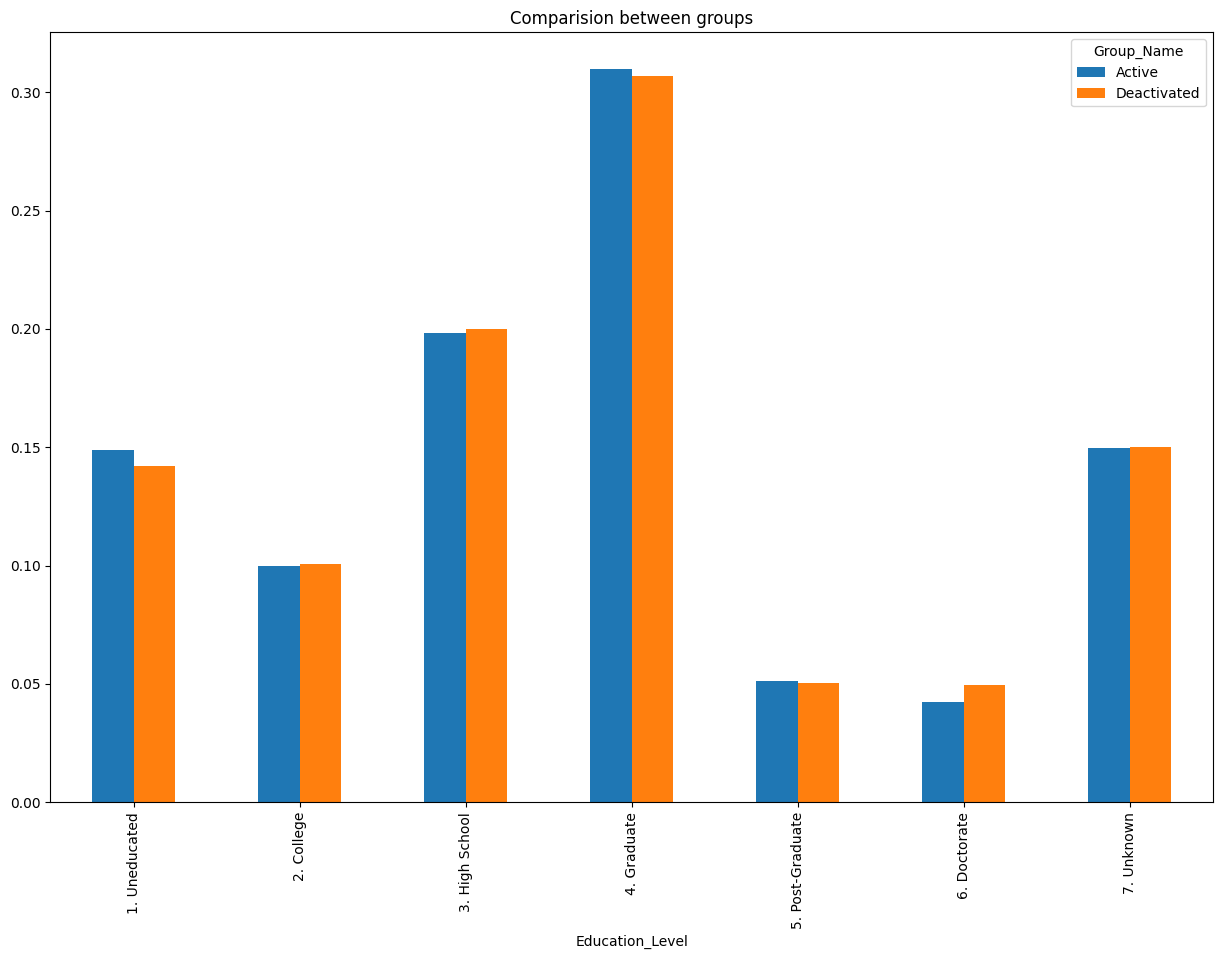

In [10]:
visualize_comparison(education_level_ct)

In [11]:
marital_status_ct = compare_groups("Marital_Status")
marital_status_ct

Group_Name,Active,Deactivated,Diff
Marital_Status,,,
Divorced,0.074302,0.072884,0.001419
Married,0.439227,0.515277,-0.076050
Single,0.404295,0.356143,0.048152
Unknown,0.082176,0.055697,0.026479


<AxesSubplot: title={'center': 'Comparision between groups'}, xlabel='Marital_Status'>

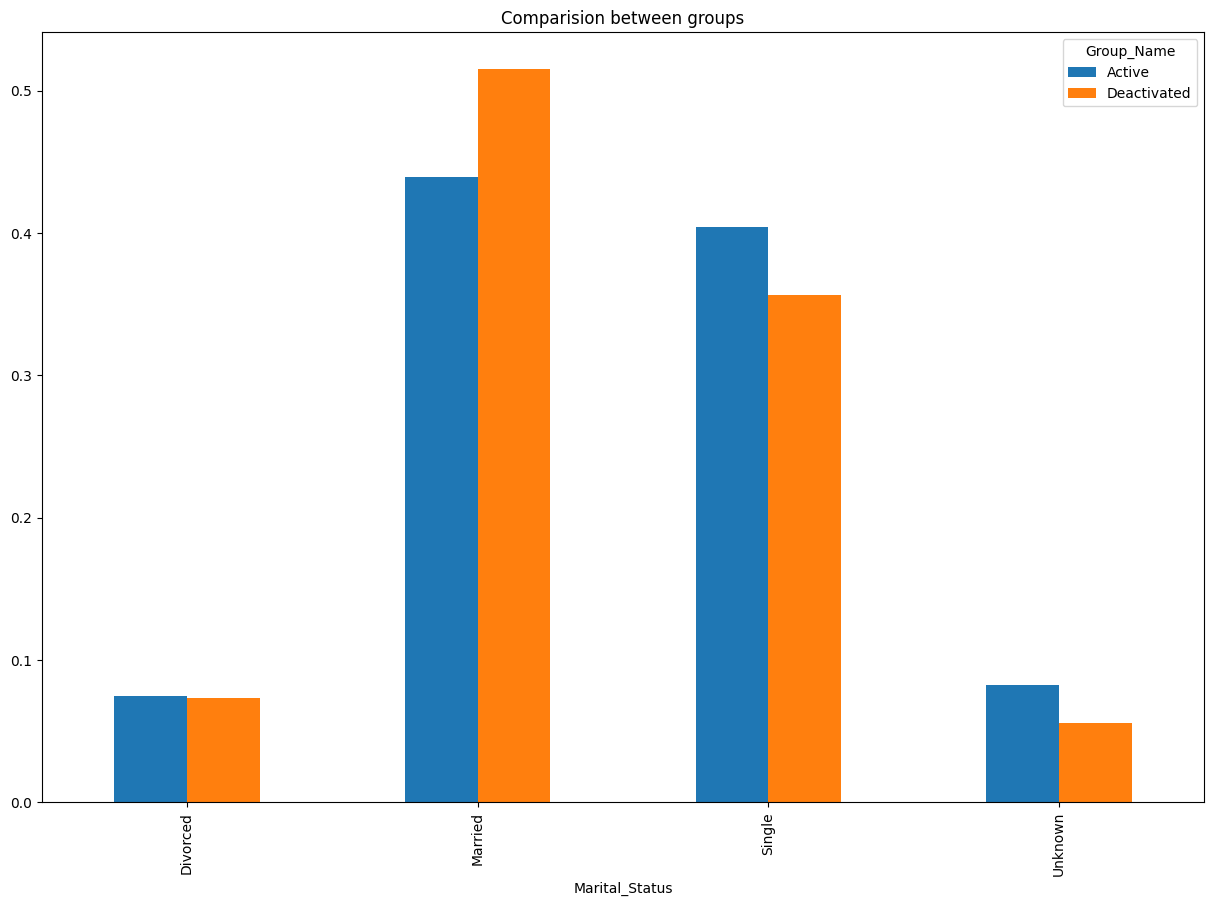

In [12]:
visualize_comparison(marital_status_ct)

In [13]:
income_category_ct = compare_groups("Income_Category")
income_category_ct

Group_Name,Active,Deactivated,Diff
Income_Category,,,
1. < $40K,0.358769,0.335773,0.022995
2. $40K - 60K,0.178096,0.173775,0.004321
3. $60K - 80K,0.136722,0.142266,-0.005545
4. $80K - 120K,0.146457,0.162954,-0.016497
5. 120K+,0.068576,0.078931,-0.010355
6. Unknown,0.111382,0.106302,0.005080


<AxesSubplot: title={'center': 'Comparision between groups'}, xlabel='Income_Category'>

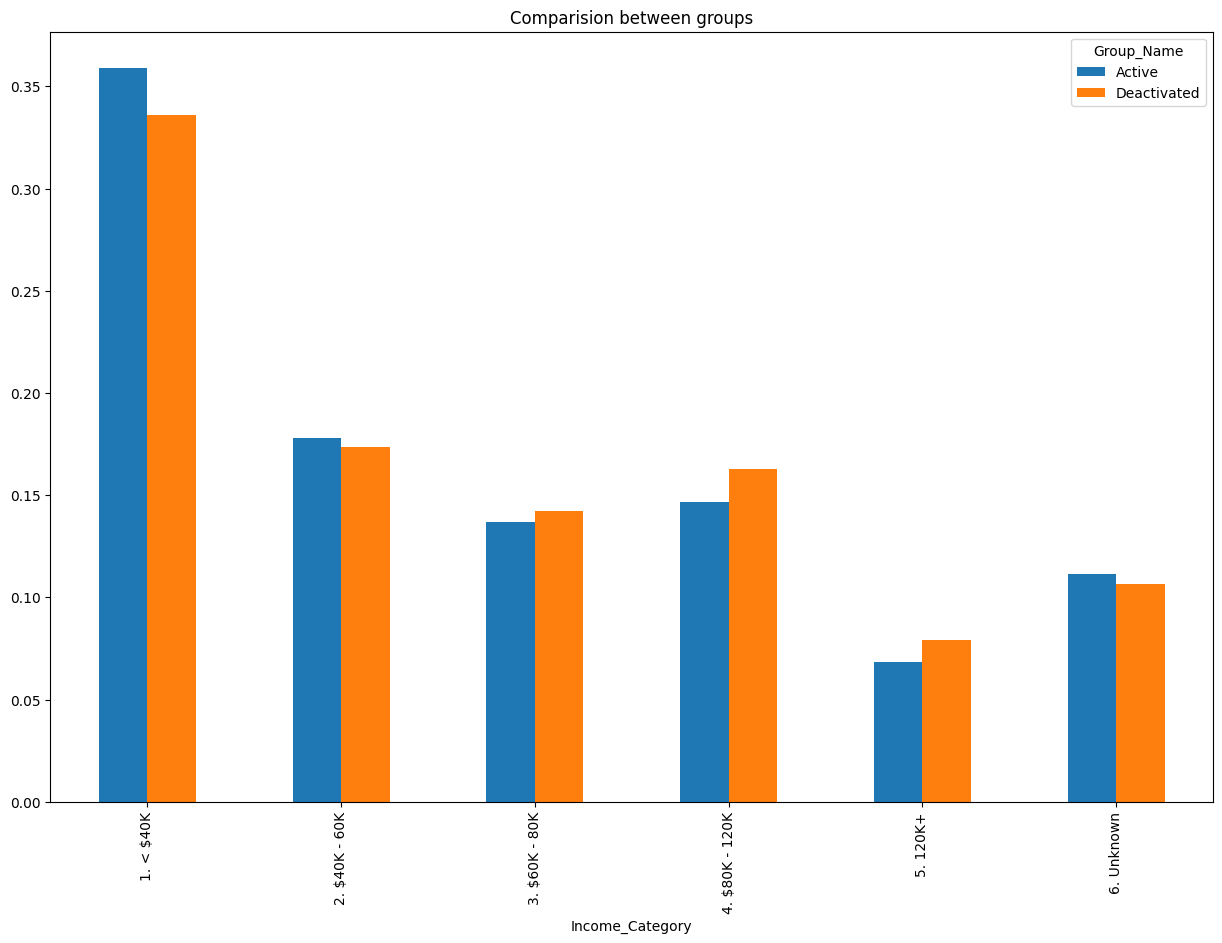

In [14]:
visualize_comparison(income_category_ct)

In [15]:
card_category_ct = compare_groups("Card_Category")
card_category_ct

Group_Name,Active,Deactivated,Diff
Card_Category,,,
1. Blue,0.920401,0.957034,-0.036633
2. Silver,0.062849,0.036919,0.025930
3. Gold,0.014173,0.005411,0.008763
4. Platinum,0.002577,0.000637,0.001940


<AxesSubplot: title={'center': 'Comparision between groups'}, xlabel='Card_Category'>

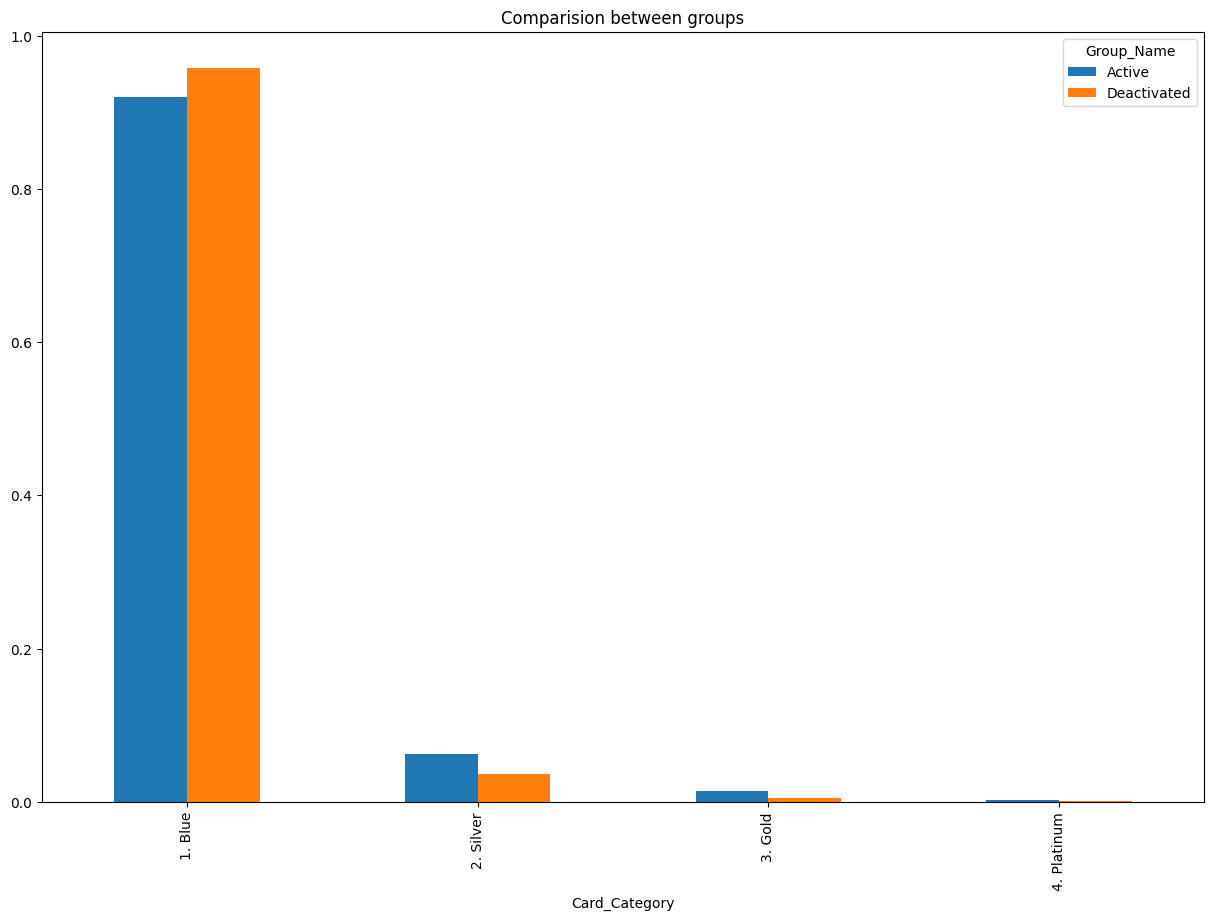

In [16]:
visualize_comparison(card_category_ct)

In [17]:
years_on_book_ct = compare_groups("Years_on_book")
years_on_book_ct

Group_Name,Active,Deactivated,Diff
Years_on_book,,,
"(1, 2]",0.062849,0.129854,-0.067005
"(2, 3]",0.541016,0.521642,0.019374
"(3, 4]",0.337724,0.269892,0.067832
"(4, 5]",0.058411,0.078612,-0.020201


<AxesSubplot: title={'center': 'Comparision between groups'}, xlabel='Years_on_book'>

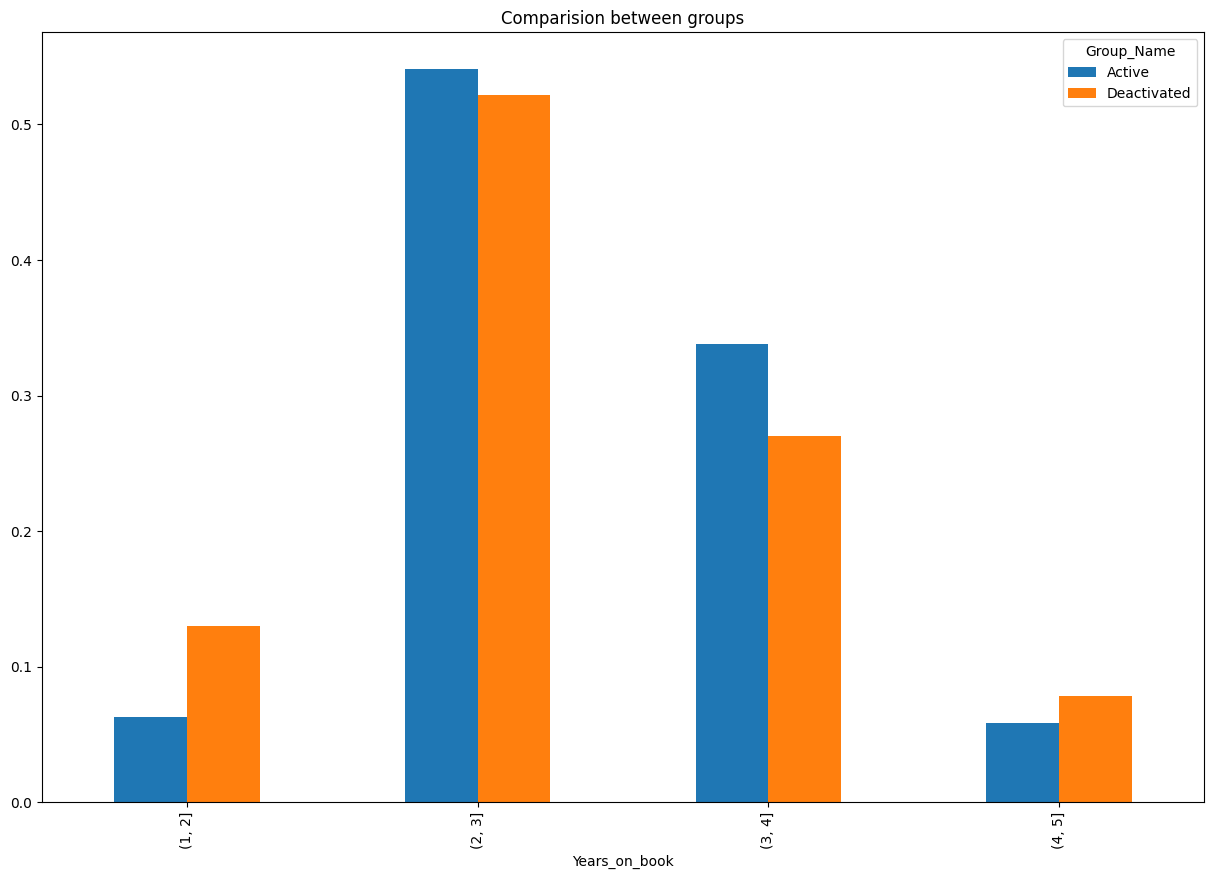

In [18]:
visualize_comparison(years_on_book_ct)

In [19]:
customer_age_ct = compare_groups("Customer_Age_agg")
customer_age_ct

Group_Name,Active,Deactivated,Diff
Customer_Age_agg,,,
"(25, 30]",0.015891,0.049013,-0.033122
"(30, 35]",0.043951,0.110439,-0.066488
"(35, 40]",0.126843,0.188415,-0.061572
"(40, 45]",0.249248,0.166454,0.082794
"(45, 50]",0.259413,0.183323,0.076090
"(50, 55]",0.176092,0.164545,0.011547
"(55, 75]",0.128561,0.137810,-0.009249


<AxesSubplot: title={'center': 'Comparision between groups'}, xlabel='Customer_Age_agg'>

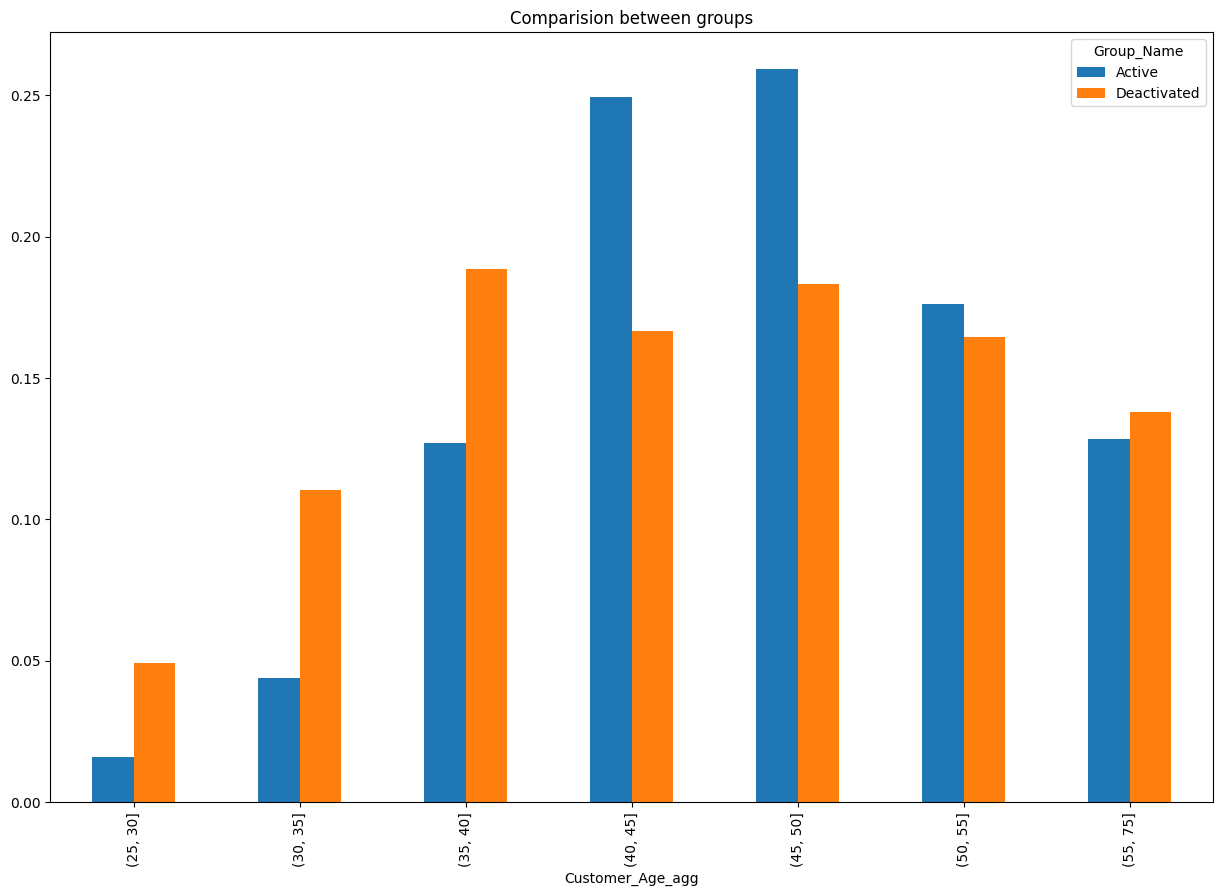

In [21]:
visualize_comparison(customer_age_ct)